<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/BinaryClassitication_WineRedWhite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Autor: Sidnei Manoel da Silva`


**RESUMO**

Duas bases de dados foram escolhidas. Uma de vinho tinto e outra de vinho branco. Essas bases originalmente foram criadas para verificar a qualidade do vinho, variando entre 0 e 10, sendo 0 menor qualidade e 10 maior qualidade.

Eu fiz uma alteração para trabalhar com a bidimensionalidade, unificando as duas base e acrescentando uma nova feature "tipo" a qual indica 0: vinho tinto e 1: vinho branco.

**Dataset Original**

UCI Machine Learning Repository: Wine Quality Data Set
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [ ]:
#Fazendo os imports das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Carregando o dataset

dfred = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
dfred['tipo'] = 0

dfwhite = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
dfwhite['tipo'] = 1



In [ ]:
df = pd.concat([dfred,dfwhite]).reset_index(drop=True)


In [ ]:
#Visualização do dataset
#13 Colunas
#Tipo: 0: Red; 1: White
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [ ]:
#Verificando a quantidade de tuplas para vinho tinto e para vinho branco
df['tipo'].value_counts()

1    4898
0    1599
Name: tipo, dtype: int64

In [ ]:
#Quantidade de Tuplas para vinho Tinto: 1593
#Quantidade de Tuplas para vinho Branco: 4864 

In [ ]:
#Preparação dos dados

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

X = df.drop(columns=['tipo'])
y = df[['tipo']]

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns = df.columns[0:12])   

# Exibindo os Resultados
#-------------------------------------------------------------------------------

print('\nEntradas para o Treinamento, X...\n')
display(X.head())
print('\nSaídas para o Treinamento, y....\n')
display(y.head())

# Conjuntos de Treinamento e Teste
# Treinando com 70%
# Testando com 30%
#-------------------------------------------------------------------------------

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


Entradas para o Treinamento, X...



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333



Saídas para o Treinamento, y....



,tipo
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Funções pré-definidas de report de classificação e plot da curva de aprendizado.

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def print_results(y_test, y_pred):
  print('\nConfusion Matrix: \n\n', confusion_matrix(y_test, y_pred))
  print('\nClassification Report: \n\n', classification_report(y_test, y_pred))
  print('\nAccuracy Score: \n\n', accuracy_score(y_test, y_pred), '\n')
  return

def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  print('\n\nLearning Curve... \n\n')
  print('\n', history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, [history_df.columns[1], history_df.columns[3]]].plot()

  print(("\nBest Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df[history_df.columns[2]].min(), 
              history_df[history_df.columns[3]].max()))
  print('\n ')
  return


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                156       
                                                                 
 dense_13 (Dense)            (None, 16)                208       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 381
Trainable params: 381
Non-trainable params: 0
_________________________________________________________________


None

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.6157 - binary_accuracy: 0.6785 - val_loss: 0.5205 - val_binary_accuracy: 0.7678
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: 0.4490 - binary_accuracy: 0.7656 - val_loss: 0.3351 - val_binary_accuracy: 0.8623
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: 0.2452 - binary_accuracy: 0.9305 - val_loss: 0.1673 - val_binary_accuracy: 0.9729
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: 0.1296 - binary_accuracy: 0.9761 - val_loss: 0.1035 - val_binary_accuracy: 0.9766
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0879 - binary_accuracy: 0.9811 - val_loss: 0.0794 - val_binary_accuracy: 0.9824
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 0.0703 - binary_accuracy: 0.9824 - val_loss: 0.0695 - val_binary_accuracy: 0.9832
Epoch 7/10
100/100 [==============================] - 0s 2ms/ste

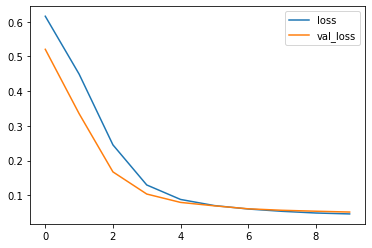

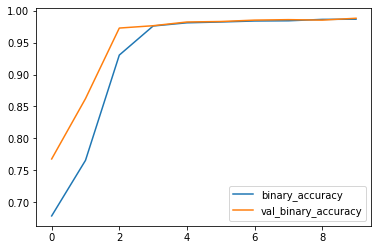

In [ ]:
#Declarando as camadas
#Entrada, Oculta, Saída
#Define, Compila, Treina e Avalia o modelo

# Importa as bibliotecas
#-------------------------------------------------------------------------------

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

# Define o Modelo
#-------------------------------------------------------------------------------

model = keras.Sequential(layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1]])) # Entrada
model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(16, activation='sigmoid'))
#model.add(layers.Dense(16, activation='sigmoid'))
model.add(layers.Dense(y_train.shape[1], activation='sigmoid')) # Saída

display(model.summary())

# Compila o Modelo
#-------------------------------------------------------------------------------

model.compile(loss='binary_crossentropy',  # Multiclass loss
              optimizer='adam', 
              metrics=['binary_accuracy'])

# Treina o Modelo
#-------------------------------------------------------------------------------

history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.3,
    epochs=10,
    verbose=1,  
)

# Avalia o Modelo
#-------------------------------------------------------------------------------
y_pred = model.predict(X_test) > 0.5   # classes binárias, retorna a probabilidade de ser 1, então > 0.5 é classe 1, senão é classe 0

print_results(y_test, y_pred)
display_acc_hist(history)

In [ ]:
#Modelo sequencial

#12 Features de Entrada
#16 Neurônios intermediários (ocultos)
#1 Neurônio de saída

# Conclusão

Vejo que, com acurácia de 0,98 o modelo está muito bom, obtendo um percentual ótimo para acerto, quando da entrada de novos valores isto é, valores que não pertencem ao dataset.
